In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [304]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [306]:
len(df)

8693

In [307]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [308]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [309]:
for name in ['CryoSleep', 'VIP', 'Name']: # У 'CryoSleep', 'VIP' можно заменять пустые на вероятность
    df[name].fillna(df[name].value_counts().index[0], inplace=True)

for name in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    df[name].fillna(df[name].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10912\1285601926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[name].fillna(df[name].value_counts().index[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_10912\1285601926.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[name].fillna(df[name]

In [310]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64

In [311]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10912\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [312]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64

In [313]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [314]:
N = len(df)
parents = [0 for _ in range(N)]
for index in range(N):
    a, b = df['PassengerId'][index].split('_')
    try:
        sename = df['Name'][index].split(' ')[1]
    except:
        print(df['Name'][index])
    if b == '01':
        count = -1
        for i in range(index, N):
            if ((df['PassengerId'][i].split('_')[0] == a) and 
                (df['Name'][i].split(' ')[1] == sename)):
                count += 1
            else:
                break
        for i in range(index, index + count + 1):
            parents[i] = count

df['Parents'] = pd.Series(parents)

<Axes: >

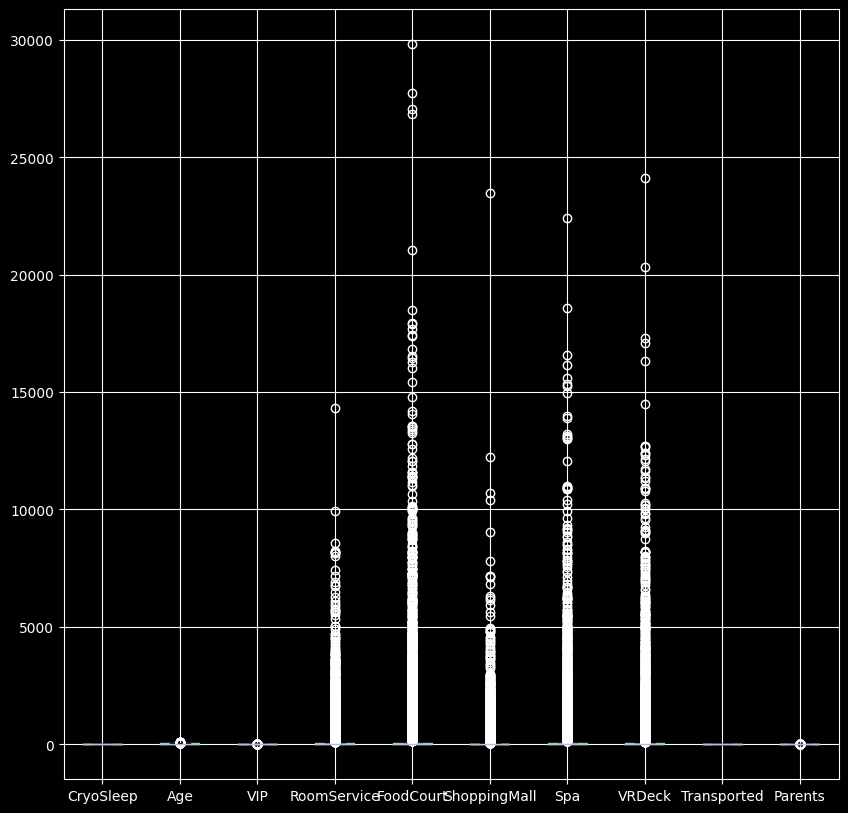

In [315]:
plt.figure(figsize=(10, 10))
df.boxplot()

In [316]:
for name in ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    q1 = df[name].quantile(0.25)  # первый квартиль
    q3 = df[name].quantile(0.75)  # третий квартиль
    median_value = df[name].median()
    df[name] = df[name].apply(lambda x: median_value if ((x < q1) or (x > q3)) else x)

<Axes: >

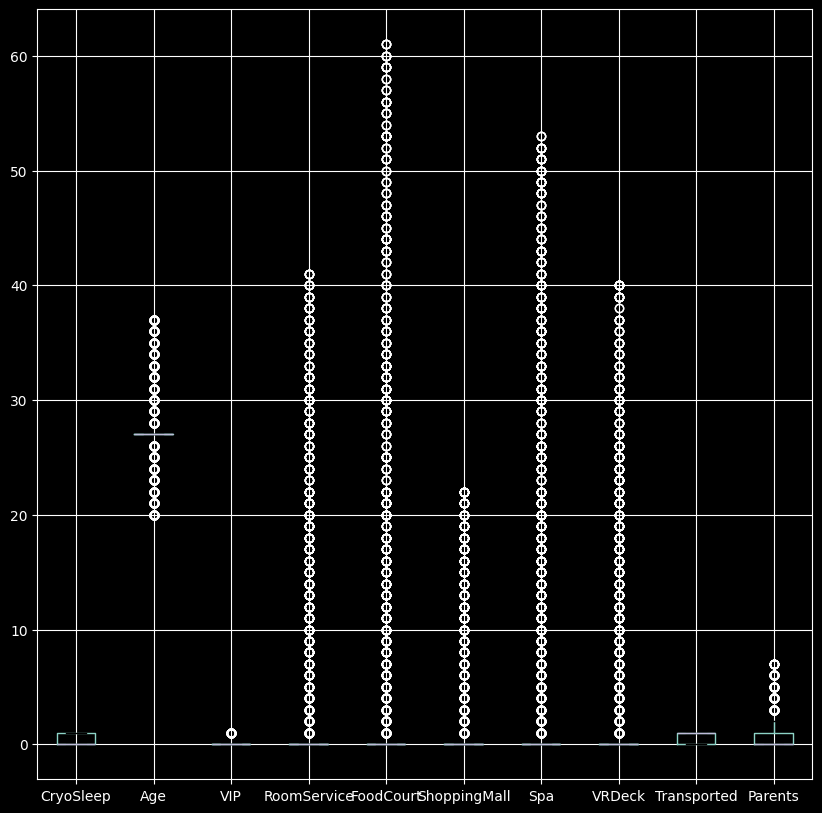

In [317]:
plt.figure(figsize=(10, 10))
df.boxplot()

In [318]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Parents
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,0.0,9.0,0.0,0.0,0.0,Juanna Vines,True,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,27.0,True,0.0,0.0,0.0,0.0,0.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,0.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,2.0,Willy Santantines,True,0


In [319]:
df.drop(['Cabin'], axis=1, inplace=True)

df.drop(['Name'], axis=1, inplace=True)

df.drop(['HomePlanet'], axis=1, inplace=True)

df.drop(['Destination'], axis=1, inplace=True)

<Axes: >

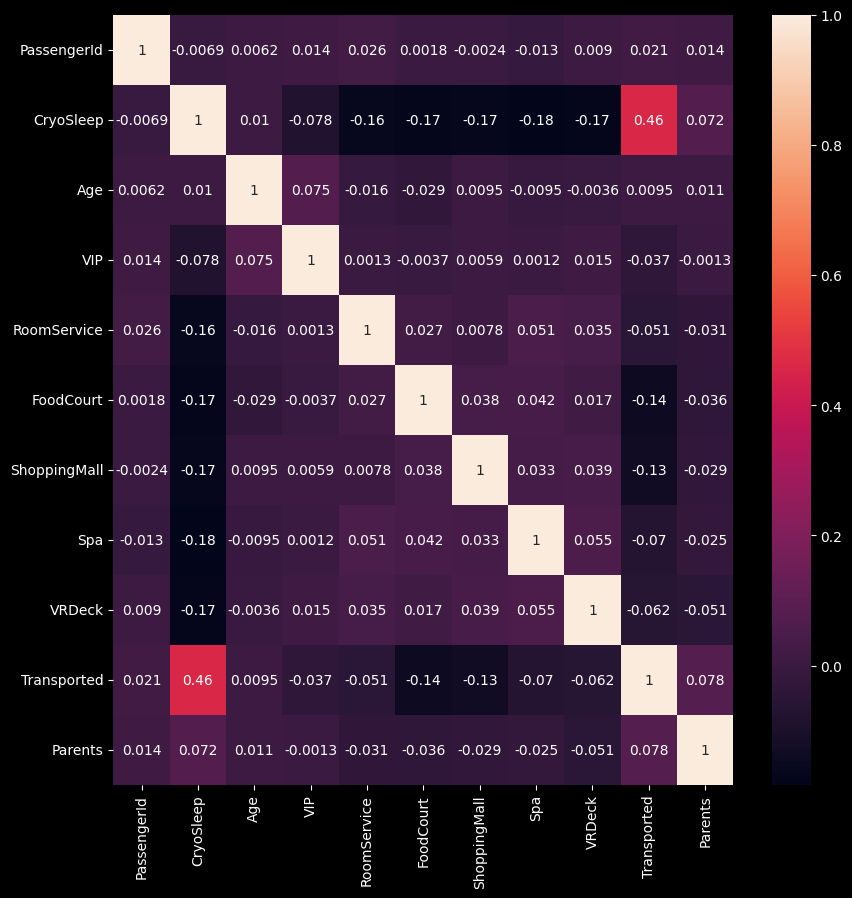

In [320]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, 
        annot=True)

In [321]:
for name in ['Spa', 'VRDeck', 'ShoppingMall', 'FoodCourt', 'PassengerId']:
    df.drop([name], axis=1, inplace=True)  

In [322]:
df.head()

,CryoSleep,Age,VIP,RoomService,Transported,Parents
0,False,27.0,False,0.0,False,0
1,False,24.0,False,0.0,True,0
2,False,27.0,True,0.0,False,1
3,False,33.0,False,0.0,False,1
4,False,27.0,False,0.0,True,0


In [323]:
df['VIP'] = np.where(df['VIP'], 1, 0)
df['Transported'] = np.where(df['Transported'], 1, 0)
df['CryoSleep'] = np.where(df['CryoSleep'], 1, 0)

In [324]:
df.head()

,CryoSleep,Age,VIP,RoomService,Transported,Parents
0,0,27.0,0,0.0,0,0
1,0,24.0,0,0.0,1,0
2,0,27.0,1,0.0,0,1
3,0,33.0,0,0.0,0,1
4,0,27.0,0,0.0,1,0


In [325]:
y_vals = df['Transported'].copy()

In [326]:
for name in ['Age', 'RoomService', 'Parents']:
    df[[name]] = (df[[name]] - df[[name]].min()) / (df[[name]].max() - df[[name]].min())

In [327]:
df.head()

,CryoSleep,Age,VIP,RoomService,Transported,Parents
0,0,0.411765,0,0.0,0,0.000000
1,0,0.235294,0,0.0,1,0.000000
2,0,0.411765,1,0.0,0,0.142857
3,0,0.764706,0,0.0,0,0.142857
4,0,0.411765,0,0.0,1,0.000000


<Axes: >

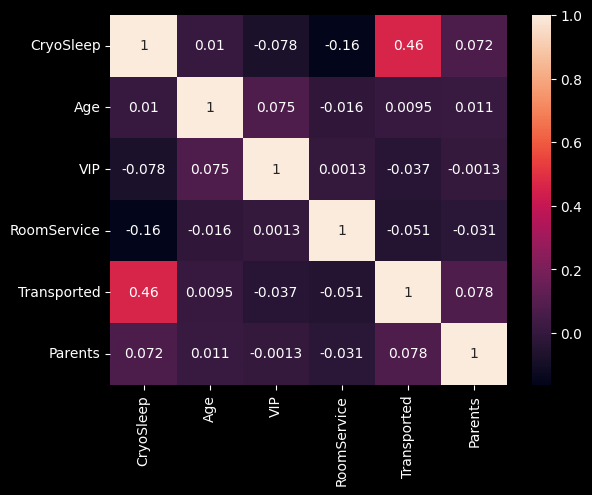

In [328]:
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, 
        annot=True)

In [329]:
X, Y = df.drop(['Transported'], axis=1), df['Transported'].copy()

In [330]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Random Forest

In [331]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

rf_predictions = rf_model.predict(X_test)

In [332]:
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_predictions))
print(classification_report(Y_test, rf_predictions))
print(confusion_matrix(Y_test, rf_predictions))

Random Forest Accuracy: 0.7070552147239264
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1289
           1       0.76      0.61      0.68      1319

    accuracy                           0.71      2608
   macro avg       0.72      0.71      0.70      2608
weighted avg       0.72      0.71      0.70      2608

[[1036  253]
 [ 511  808]]


In [333]:
res_df = pd.DataFrame({'real_data': Y_test, 'predicted_data': rf_predictions})
res_df.head(10)

,real_data,predicted_data
304,1,0
2697,0,1
8424,0,1
1672,1,0
8458,1,1
3438,1,0
3362,0,1
3235,0,0
1139,1,1
1210,0,0


In [334]:
res_df['score'] = np.where(res_df['real_data'] == res_df['predicted_data'], 1, 0)
print(f'{res_df['score'].sum()} / {len(res_df)}')
res_df['score'].sum() / len(res_df)

1844 / 2608


np.float64(0.7070552147239264)

# XGBoost

In [335]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, Y_train)

xgb_predictions = xgb_model.predict(X_test)
xgb_predictions

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


array([0, 0, 1, ..., 0, 0, 0])

In [336]:
print("XGBoost Accuracy:", accuracy_score(Y_test, xgb_predictions))
print(classification_report(Y_test, xgb_predictions))
print(confusion_matrix(Y_test, xgb_predictions))

XGBoost Accuracy: 0.7166411042944786
              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1289
           1       0.78      0.61      0.69      1319

    accuracy                           0.72      2608
   macro avg       0.73      0.72      0.71      2608
weighted avg       0.73      0.72      0.71      2608

[[1061  228]
 [ 511  808]]


In [337]:
res_df = pd.DataFrame({'real_data': Y_test, 'predicted_data': xgb_predictions})
res_df.head(10)

,real_data,predicted_data
304,1,0
2697,0,0
8424,0,1
1672,1,0
8458,1,1
3438,1,0
3362,0,1
3235,0,0
1139,1,1
1210,0,0


In [338]:
res_df['score'] = np.where(res_df['real_data'] == res_df['predicted_data'], 1, 0)
print(f'{res_df['score'].sum()} / {len(res_df)}')
res_df['score'].sum() / len(res_df)

1869 / 2608


np.float64(0.7166411042944786)